# The Cancer Gene Atlas Cancer (TCGA) - Prostate Adenocarcinoma (PRAD)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
pandas 0.22.0
clustergrammer_widget 1.9.0
seaborn 0.8.1
Wed May 09 12:16:28 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Prostate adenocarcinoma [PRAD]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VV,528,PRAD,TCGA,75A7AFB5-66D5-47E3-8A8A-3E3A1E749A96,2A,52.0,NaN,389,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-A8VT,529,PRAD,TCGA,931B549F-B9F2-4E8D-83ED-FF663671883C,2A,47.0,NaN,389,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-AAYF,530,PRAD,TCGA,490E84ED-3C02-4593-990E-ADE5C109DF44,2A,57.0,NaN,429,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-A8VL,531,PRAD,TCGA,49197847-CC83-4CE1-8397-D09CEA4C4928,2A,51.0,NaN,389,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-A8VX,532,PRAD,TCGA,942F1788-D977-4AC0-A177-659F9D4CD077,2A,70.0,NaN,389,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(500, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_PRAD_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,5e98d231-92c6-4ec7-aa06-636bb0413e99,912b790c-a7b0-4d5c-b68d-498f04f68c63,357c3ecd-cb51-4c9e-9b4d-270a6757b595,ab7cbe38-691d-46a1-acb3-75f726d83dc2,360be740-b3ca-45e0-8311-d3a3d07997bc,485670e1-9578-4609-8c46-59967e2e9766,94c8c374-3d3b-4ebc-bb7b-af832be0faa4,b5b0e797-db9a-4ba3-b49b-b77add83bd5d,45457b13-9d75-46e4-b3e4-f618f9b1ae6d,c71da60d-21c8-42aa-984d-9adf80998928,...,60f7af70-853d-48a5-ba15-262ce3412440,75a7e8e1-8712-4e9e-953c-6dc1ed93c4ff,58591d6d-eff4-47a3-91d0-61cf706e03f0,eae805f2-0622-4a49-bbaf-16bdc9ed4aab,5e395749-4e39-43a9-899e-ec96e3df3e82,87b6db35-4c32-420f-a9eb-767ee453b478,93ae3520-ff29-417c-9b50-eaad7ff76bed,aa938bcc-581e-4da4-971e-da272b8f5d6f,fb4e1afb-f6fd-4073-961c-6adb8140ee6b,a95cd82f-c371-448d-b5be-09debd1fc47a
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,180.048000,140.3260,160.655000,201.44400,152.81100,204.08100,245.9480,197.6710,137.567000,178.249000,...,113.740000,193.69200,135.5530,201.225000,154.931000,170.5970,195.875000,95.5281,221.409000,230.643000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,38.302100,14.7172,35.070100,21.19480,37.07390,26.16310,16.4883,19.1353,38.041800,41.497400,...,0.534487,15.78360,29.6350,26.117400,40.595800,19.4124,20.564200,14.2495,14.303300,26.225400
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,18.076600,13.3872,16.909800,8.70607,12.30240,18.12760,25.2984,10.9072,18.069700,20.704500,...,6.949060,21.15430,29.7858,14.879700,19.518100,11.3352,14.936900,22.8307,11.231800,22.787400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,98.183100,57.1882,96.628300,81.09780,45.70040,59.42610,78.5950,60.6312,85.981000,91.446200,...,33.906700,62.27130,126.6980,120.421000,109.205000,74.1744,94.435100,42.3115,66.148800,127.440000
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.342213,0.0000,0.074781,1.11296,4.49812,1.49638,0.0000,0.0000,0.758712,0.473832,...,0.000000,0.09255,0.0000,0.243004,0.309396,0.0000,0.204563,0.0000,0.166841,0.134451


In [19]:
matrix.shape

(199169, 558)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,5e98d231-92c6-4ec7-aa06-636bb0413e99,912b790c-a7b0-4d5c-b68d-498f04f68c63,357c3ecd-cb51-4c9e-9b4d-270a6757b595,ab7cbe38-691d-46a1-acb3-75f726d83dc2,360be740-b3ca-45e0-8311-d3a3d07997bc,485670e1-9578-4609-8c46-59967e2e9766,94c8c374-3d3b-4ebc-bb7b-af832be0faa4,b5b0e797-db9a-4ba3-b49b-b77add83bd5d,45457b13-9d75-46e4-b3e4-f618f9b1ae6d,c71da60d-21c8-42aa-984d-9adf80998928,...,60f7af70-853d-48a5-ba15-262ce3412440,75a7e8e1-8712-4e9e-953c-6dc1ed93c4ff,58591d6d-eff4-47a3-91d0-61cf706e03f0,eae805f2-0622-4a49-bbaf-16bdc9ed4aab,5e395749-4e39-43a9-899e-ec96e3df3e82,87b6db35-4c32-420f-a9eb-767ee453b478,93ae3520-ff29-417c-9b50-eaad7ff76bed,aa938bcc-581e-4da4-971e-da272b8f5d6f,fb4e1afb-f6fd-4073-961c-6adb8140ee6b,a95cd82f-c371-448d-b5be-09debd1fc47a
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,180.048000,140.3260,160.655000,201.44400,152.81100,204.08100,245.9480,197.6710,137.567000,178.249000,...,113.740000,193.69200,135.5530,201.225000,154.931000,170.5970,195.875000,95.5281,221.409000,230.643000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,38.302100,14.7172,35.070100,21.19480,37.07390,26.16310,16.4883,19.1353,38.041800,41.497400,...,0.534487,15.78360,29.6350,26.117400,40.595800,19.4124,20.564200,14.2495,14.303300,26.225400
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,18.076600,13.3872,16.909800,8.70607,12.30240,18.12760,25.2984,10.9072,18.069700,20.704500,...,6.949060,21.15430,29.7858,14.879700,19.518100,11.3352,14.936900,22.8307,11.231800,22.787400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,98.183100,57.1882,96.628300,81.09780,45.70040,59.42610,78.5950,60.6312,85.981000,91.446200,...,33.906700,62.27130,126.6980,120.421000,109.205000,74.1744,94.435100,42.3115,66.148800,127.440000
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.342213,0.0000,0.074781,1.11296,4.49812,1.49638,0.0000,0.0000,0.758712,0.473832,...,0.000000,0.09255,0.0000,0.243004,0.309396,0.0000,0.204563,0.0000,0.166841,0.134451


In [22]:
matrix.shape

(79930, 558)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-J4-8198-01,TCGA-KK-A59Z-01,TCGA-KC-A4BN-01,TCGA-EJ-A46G-01,TCGA-EJ-A46E-01,TCGA-KC-A4BV-01,TCGA-KK-A59Y-01,TCGA-J9-A52C-01,TCGA-EJ-A46I-01,TCGA-KC-A4BL-01,...,TCGA-X4-A8KS-01,TCGA-YL-A9WK-01,TCGA-VN-A943-01,TCGA-V1-A9Z9-01,TCGA-XK-AAIR-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9L0-01,TCGA-ZG-A9N3-01,TCGA-KK-A5A1-01,TCGA-J9-A52D-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,180.048000,140.3260,160.655000,201.44400,152.81100,204.08100,245.9480,197.6710,137.567000,178.249000,...,113.740000,193.69200,135.5530,201.225000,154.931000,170.5970,195.875000,95.5281,221.409000,230.643000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,38.302100,14.7172,35.070100,21.19480,37.07390,26.16310,16.4883,19.1353,38.041800,41.497400,...,0.534487,15.78360,29.6350,26.117400,40.595800,19.4124,20.564200,14.2495,14.303300,26.225400
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,18.076600,13.3872,16.909800,8.70607,12.30240,18.12760,25.2984,10.9072,18.069700,20.704500,...,6.949060,21.15430,29.7858,14.879700,19.518100,11.3352,14.936900,22.8307,11.231800,22.787400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,98.183100,57.1882,96.628300,81.09780,45.70040,59.42610,78.5950,60.6312,85.981000,91.446200,...,33.906700,62.27130,126.6980,120.421000,109.205000,74.1744,94.435100,42.3115,66.148800,127.440000
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.342213,0.0000,0.074781,1.11296,4.49812,1.49638,0.0000,0.0000,0.758712,0.473832,...,0.000000,0.09255,0.0000,0.243004,0.309396,0.0000,0.204563,0.0000,0.166841,0.134451


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-J4-8198-01,TCGA-KK-A59Z-01,TCGA-KC-A4BN-01,TCGA-EJ-A46G-01,TCGA-EJ-A46E-01,TCGA-KC-A4BV-01,TCGA-KK-A59Y-01,TCGA-J9-A52C-01,TCGA-EJ-A46I-01,TCGA-KC-A4BL-01,...,TCGA-X4-A8KS-01,TCGA-YL-A9WK-01,TCGA-VN-A943-01,TCGA-V1-A9Z9-01,TCGA-XK-AAIR-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9L0-01,TCGA-ZG-A9N3-01,TCGA-KK-A5A1-01,TCGA-J9-A52D-01
ARF5,180.048000,140.3260,160.655000,201.44400,152.81100,204.08100,245.9480,197.6710,137.567000,178.249000,...,113.740000,193.69200,135.5530,201.225000,154.931000,170.5970,195.875000,95.5281,221.409000,230.643000
M6PR,38.302100,14.7172,35.070100,21.19480,37.07390,26.16310,16.4883,19.1353,38.041800,41.497400,...,0.534487,15.78360,29.6350,26.117400,40.595800,19.4124,20.564200,14.2495,14.303300,26.225400
ESRRA,18.076600,13.3872,16.909800,8.70607,12.30240,18.12760,25.2984,10.9072,18.069700,20.704500,...,6.949060,21.15430,29.7858,14.879700,19.518100,11.3352,14.936900,22.8307,11.231800,22.787400
FKBP4,98.183100,57.1882,96.628300,81.09780,45.70040,59.42610,78.5950,60.6312,85.981000,91.446200,...,33.906700,62.27130,126.6980,120.421000,109.205000,74.1744,94.435100,42.3115,66.148800,127.440000
CYP26B1,0.342213,0.0000,0.074781,1.11296,4.49812,1.49638,0.0000,0.0000,0.758712,0.473832,...,0.000000,0.09255,0.0000,0.243004,0.309396,0.0000,0.204563,0.0000,0.166841,0.134451


# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


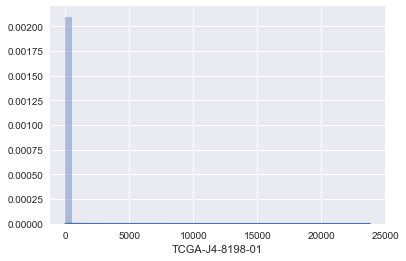

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


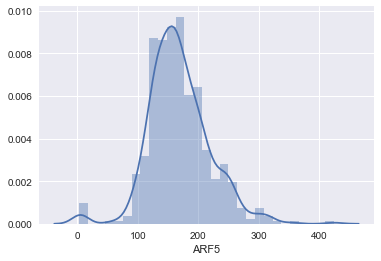

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_prad_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining missing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-J4-8198-01,TCGA-KK-A59Z-01,TCGA-KC-A4BN-01,TCGA-EJ-A46G-01,TCGA-EJ-A46E-01,TCGA-KC-A4BV-01,TCGA-KK-A59Y-01,TCGA-J9-A52C-01,TCGA-EJ-A46I-01,TCGA-KC-A4BL-01,...,TCGA-X4-A8KS-01,TCGA-YL-A9WK-01,TCGA-VN-A943-01,TCGA-V1-A9Z9-01,TCGA-XK-AAIR-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9L0-01,TCGA-ZG-A9N3-01,TCGA-KK-A5A1-01,TCGA-J9-A52D-01
A1BG,0.013904,0.064881,0.064881,0.049564,0.064881,0.064881,0.064881,2.137780e-08,0.064881,0.064881,...,0.064881,0.084947,0.064881,0.064881,0.064881,0.039794,0.064881,0.064881,0.084585,0.064881
A1CF,0.799547,0.198676,0.079371,1.163590,0.043363,0.010683,0.017877,1.174980e-02,0.018481,0.478401,...,0.008164,0.849759,0.078086,0.021057,0.037511,0.010529,0.045879,0.011021,1.390700,0.008219
A2M,158.683000,126.751000,28.385800,163.803000,77.084300,298.056000,75.197900,1.871820e+02,60.353900,205.834000,...,18.332300,135.532000,29.874300,188.148000,146.831000,271.076000,242.963000,160.529000,94.464500,22.993400
A2ML1,0.245581,0.132807,0.323411,0.133699,0.407791,0.233041,0.328902,1.471160e-01,0.278493,0.806758,...,0.087611,0.143347,0.139421,0.545986,0.546231,0.656273,0.150125,0.197620,0.159535,0.192340
A3GALT2,0.047344,0.047344,0.032214,0.056714,0.047344,0.032994,0.143314,4.734368e-02,0.047344,0.047344,...,0.047344,0.020223,0.047344,0.047344,0.047344,0.044004,0.048190,0.047344,0.047344,0.047344


In [34]:
normalized_matrix.shape

(19040, 558)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-J4-8198-01,TCGA-KK-A59Z-01,TCGA-KC-A4BN-01,TCGA-EJ-A46G-01,TCGA-EJ-A46E-01,TCGA-KC-A4BV-01,TCGA-KK-A59Y-01,TCGA-J9-A52C-01,TCGA-EJ-A46I-01,TCGA-KC-A4BL-01,...,TCGA-X4-A8KS-01,TCGA-YL-A9WK-01,TCGA-VN-A943-01,TCGA-V1-A9Z9-01,TCGA-XK-AAIR-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9L0-01,TCGA-ZG-A9N3-01,TCGA-KK-A5A1-01,TCGA-J9-A52D-01
A1BG,-1.660330,-1.052077,-1.003046,-1.128387,-0.989833,-0.997433,-0.973279,-7.449878,-1.005312,-0.983209,...,-1.038130,-0.888555,-1.008561,-1.009799,-1.009574,-1.220296,-1.014384,-1.006164,-0.904499,-1.009170
A1CF,0.099387,-0.566050,-0.915502,0.242247,-1.164832,-1.780841,-1.533105,-1.709810,-1.550699,-0.115534,...,-1.938330,0.111595,-0.928104,-1.498514,-1.247530,-1.797730,-1.164885,-1.776049,0.311440,-1.906475
A2M,2.397073,2.238756,1.637937,2.390769,2.085015,2.664747,2.090809,2.492423,1.963276,2.518191,...,1.412969,2.314342,1.654619,2.452583,2.345126,2.612973,2.559038,2.387272,2.143476,1.540315
A2ML1,-0.413262,-0.740974,-0.305409,-0.697425,-0.191513,-0.442118,-0.268330,-0.612181,-0.372615,0.111417,...,-0.907687,-0.661312,-0.676350,-0.084735,-0.084315,-0.003033,-0.650049,-0.522451,-0.628937,-0.537219
A3GALT2,-1.128195,-1.188933,-1.307119,-1.069866,-1.126689,-1.291121,-0.629108,-1.104579,-1.142168,-1.120064,...,-1.174986,-1.511848,-1.145417,-1.146654,-1.146430,-1.176625,-1.143543,-1.143019,-1.156531,-1.146026


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-J4-8198-01,TCGA-KK-A59Z-01,TCGA-KC-A4BN-01,TCGA-EJ-A46G-01,TCGA-EJ-A46E-01,TCGA-KC-A4BV-01,TCGA-KK-A59Y-01,TCGA-J9-A52C-01,TCGA-EJ-A46I-01,TCGA-KC-A4BL-01,...,TCGA-X4-A8KS-01,TCGA-YL-A9WK-01,TCGA-VN-A943-01,TCGA-V1-A9Z9-01,TCGA-XK-AAIR-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9L0-01,TCGA-ZG-A9N3-01,TCGA-KK-A5A1-01,TCGA-J9-A52D-01
A1BG,-1.647067,-1.034677,-1.033041,-1.216161,-1.110151,-1.076712,-1.014095,-6.980649,-1.100482,-1.101380,...,-0.894014,-0.897706,-0.929483,-1.097008,-1.050870,-1.204126,-1.063062,-1.044738,-0.832172,-0.868798
A1CF,0.045509,-0.541073,-0.935003,0.134144,-1.274869,-1.881592,-1.600021,-1.805209,-1.654037,-0.319854,...,-1.794527,0.096609,-0.822659,-1.654037,-1.283648,-1.777488,-1.203197,-1.914944,0.417012,-1.843894
A2M,2.441886,2.456577,1.571644,2.420118,2.091086,2.648816,2.030092,2.490691,1.968551,2.512245,...,1.804048,2.363577,1.630550,2.416986,2.332082,2.613553,2.600832,2.404732,2.242435,1.510777
A2ML1,-0.445876,-0.723016,-0.281084,-0.814587,-0.353841,-0.546880,-0.250974,-0.689999,-0.501176,-0.101385,...,-0.735574,-0.690823,-0.513743,-0.140773,-0.172757,-0.048627,-0.725517,-0.501724,-0.554432,-0.285035
A3GALT2,-1.128744,-1.172551,-1.338855,-1.164740,-1.238854,-1.368340,-0.648210,-1.181557,-1.226466,-1.224226,...,-1.042786,-1.510875,-1.089631,-1.228949,-1.177016,-1.163819,-1.185169,-1.180976,-1.103687,-1.023429


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-J4-8198-01,TCGA-KK-A59Z-01,TCGA-KC-A4BN-01,TCGA-EJ-A46G-01,TCGA-EJ-A46E-01,TCGA-KC-A4BV-01,TCGA-KK-A59Y-01,TCGA-J9-A52C-01,TCGA-EJ-A46I-01,TCGA-KC-A4BL-01,...,TCGA-X4-A8KS-01,TCGA-YL-A9WK-01,TCGA-VN-A943-01,TCGA-V1-A9Z9-01,TCGA-XK-AAIR-01,TCGA-ZG-A9LN-01,TCGA-ZG-A9L0-01,TCGA-ZG-A9N3-01,TCGA-KK-A5A1-01,TCGA-J9-A52D-01
A1BG,-7.605669,-0.336725,-0.317313,-2.490904,-1.232589,-0.835677,-0.092426,-70.914126,-1.117823,-1.128479,...,1.332912,1.289092,0.911898,-1.076581,-0.528942,-2.348057,-0.673656,-0.456147,2.066960,1.632220
A1CF,3.947155,2.408527,1.375230,4.179648,0.483746,-1.107714,-0.369142,-0.907357,-0.510828,2.988792,...,-0.879338,4.081192,1.669914,-0.510828,0.460720,-0.834643,0.671746,-1.195198,4.921625,-1.008829
A2M,0.552362,0.595441,-1.999485,0.488529,-0.476304,1.159150,-0.655158,0.695474,-0.835617,0.758677,...,-1.317995,0.322732,-1.826753,0.479346,0.230379,1.055746,1.018446,0.443413,-0.032495,-2.177968
A2ML1,-0.106754,-1.011628,0.431297,-1.310609,0.193743,-0.436537,0.529607,-0.903827,-0.287312,1.018022,...,-1.052628,-0.906517,-0.328344,0.889418,0.784988,1.190279,-1.019792,-0.289101,-0.461194,0.418398
A3GALT2,0.132255,-0.212521,-1.521409,-0.151049,-0.734354,-1.753465,3.914274,-0.283401,-0.636859,-0.619224,...,0.808790,-2.875276,0.440095,-0.656399,-0.247663,-0.143795,-0.311833,-0.278830,0.329472,0.961132


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19040, 550)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18618, 550)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18528, 550)

# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


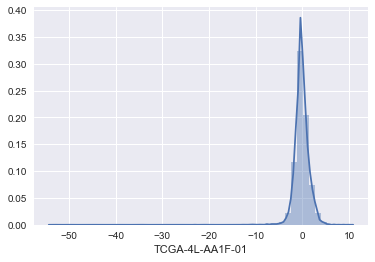

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


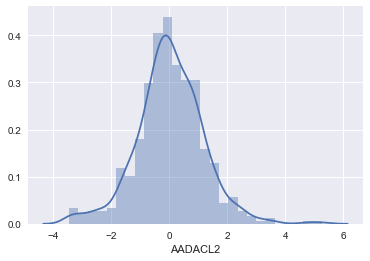

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_prad_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18528, 2)

# Save Gene List

In [56]:
filename = path+'tcga_prad_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-2A-A8VL-01,51,MALE,NaN,N0,T2b,NaN,Prostate Adenocarcinoma Acinar Type,Primary Solid Tumor,Prostate,NaN
TCGA-2A-A8VO-01,57,MALE,NaN,NaN,T3a,NaN,Prostate Adenocarcinoma Acinar Type,Primary Solid Tumor,Prostate,NaN
TCGA-2A-A8VT-01,47,MALE,NaN,N1,T4,NaN,Prostate Adenocarcinoma Acinar Type,Primary Solid Tumor,Prostate,NaN
TCGA-2A-A8VV-01,52,MALE,NaN,N0,T2b,NaN,Prostate Adenocarcinoma Acinar Type,Primary Solid Tumor,Prostate,NaN
TCGA-2A-A8VX-01,70,MALE,NaN,N0,T3b,NaN,Prostate Adenocarcinoma Acinar Type,Primary Solid Tumor,Prostate,NaN


In [60]:
attribute_list.shape

(550, 10)

# Save Attribute List

In [87]:
filename = path+'tcga_prad_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-2A-A8VL-01,TCGA-2A-A8VO-01,TCGA-2A-A8VT-01,TCGA-2A-A8VV-01,TCGA-2A-A8VX-01,TCGA-2A-A8W1-01,TCGA-2A-A8W3-01,TCGA-2A-AAYF-01,TCGA-2A-AAYO-01,TCGA-2A-AAYU-01,...,TCGA-ZG-A9LN-01,TCGA-ZG-A9LS-01,TCGA-ZG-A9LU-01,TCGA-ZG-A9LY-01,TCGA-ZG-A9LZ-01,TCGA-ZG-A9M4-01,TCGA-ZG-A9MC-01,TCGA-ZG-A9N3-01,TCGA-ZG-A9ND-01,TCGA-ZG-A9NI-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.337885,0.079660,-0.948732,0.461641,0.567158,0.803805,0.294228,0.629040,0.257846,-0.847044,...,-0.821628,-0.668994,-0.810718,0.090586,0.541669,-0.305642,-0.690781,-0.352879,-0.916042,0.141516
A1CF,0.684017,-0.334364,0.571151,-0.301618,-0.199911,-0.058071,-0.261677,0.589347,0.000034,0.396519,...,-0.581425,-0.970137,-0.625031,-0.276246,-0.199911,-0.043576,-0.250775,-0.734020,-0.399794,0.960819
A2M,-0.777805,0.556432,-0.545238,-0.210953,-0.276410,-0.999239,0.181690,-0.349021,0.232575,0.058080,...,0.698447,0.854970,-0.498050,0.469133,0.116272,-0.083714,0.796713,0.349066,-0.712397,0.134465
A2ML1,0.644711,-0.700562,-0.762335,0.160803,0.950670,-0.257303,-0.471623,0.419148,0.080804,-0.322670,...,0.775787,-0.111900,-0.929442,0.106262,0.626529,0.488226,0.757596,-0.213668,0.703005,0.681149
A3GALT2,0.945962,0.101597,-0.174740,0.330721,0.701942,-0.614413,0.163356,0.483502,-0.658029,-0.625324,...,-0.127477,-0.439996,-0.269248,-0.745239,-0.868770,0.862144,-0.432738,-0.251073,-0.519971,0.068853


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

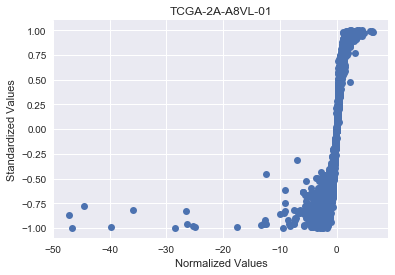

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_prad_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-2A-A8VL-01,TCGA-2A-A8VO-01,TCGA-2A-A8VT-01,TCGA-2A-A8VV-01,TCGA-2A-A8VX-01,TCGA-2A-A8W1-01,TCGA-2A-A8W3-01,TCGA-2A-AAYF-01,TCGA-2A-AAYO-01,TCGA-2A-AAYU-01,...,TCGA-ZG-A9LN-01,TCGA-ZG-A9LS-01,TCGA-ZG-A9LU-01,TCGA-ZG-A9LY-01,TCGA-ZG-A9LZ-01,TCGA-ZG-A9M4-01,TCGA-ZG-A9MC-01,TCGA-ZG-A9N3-01,TCGA-ZG-A9ND-01,TCGA-ZG-A9NI-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,1
A2M,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_prad_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_prad_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_prad_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_prad_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_prad_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-2A-A8VL, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-A8VO, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-A8VT, Age:47.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-A8VV, Age:52.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-A8VX, Age:70.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-A8W1, Age:54.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-A8W3, Age:69.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-AAYF, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-AAYO, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-2A-AAYU, Age:56.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)",...,"(Donor:TCGA-ZG-A9LN, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9LS, Age:64.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9LU, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9LY, Age:60.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9LZ, Age:66.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9M4, Age:65.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9MC, Age:69.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9N3, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9ND, Age:55.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)","(Donor:TCGA-ZG-A9NI, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-2A-A8VL, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acinar Type, Tissue:Prostate, Tumor:nan, Gradenan)",1.000000,0.086608,-0.023280,0.087256,0.084450,0.021855,-0.075519,0.063729,0.173858,0.090546,...,-0.013444,0.089388,0.127058,-0.049610,-0.013664,-0.047717,-0.088014,-0.031336,0.038873,-0.014651
"(Donor:TCGA-2A-A8VO, Age:57.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Prostate Adenocarcinoma Acin

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_prad_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [ ]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [82]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [83]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.023560,-0.097001,-0.022145,0.032203,-0.015671,0.048698,0.079504,0.006266,0.111860,...,0.053359,0.064607,-0.002360,0.001650,-0.021777,-0.001515,-0.072524,-0.111279,-0.007731,-0.038692
A1CF,0.023560,1.000000,-0.014378,-0.065038,-0.016053,-0.186297,-0.113018,-0.033383,0.040775,-0.087474,...,0.132443,0.010329,0.139025,0.184391,0.072366,-0.111639,0.041462,-0.110003,0.095730,0.140244
A2M,-0.097001,-0.014378,1.000000,0.080272,-0.190879,0.173903,-0.007654,-0.335356,-0.102624,-0.155288,...,-0.178011,-0.212730,0.017811,-0.060655,-0.212350,-0.223262,0.370847,0.555159,0.087061,0.208039
A2ML1,-0.022145,-0.065038,0.080272,1.000000,-0.081785,-0.024914,0.001200,-0.070568,0.011638,0.001447,...,0.119391,0.064207,0.108151,0.005812,0.117375,0.244510,0.150309,-0.005395,0.073749,0.175314
A3GALT2,0.032203,-0.016053,-0.190879,-0.081785,1.000000,-0.114812,0.024648,0.111453,-0.043436,0.084373,...,0.082305,0.115334,-0.102686,-0.063341,0.017129,0.119614,-0.184711,-0.138121,-0.058583,-0.155323


# Save Gene Similarity Matrix

In [84]:
filename = path+'tcga_prad_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [85]:
name = 'tcga_prad_gene_attribute_edge_list'

In [86]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  550 Out of 550   

 The number of statisticaly relevent gene-attribute associations is: 509464
